In [1]:
%load_ext autoreload
%autoreload 2
import lusee
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# why does this not work?
#lusee_drive = os.environ['LUSEE_DRIVE_DIR']
lusee_drive = '/home/anze/work/lusee/Drive/'

In [3]:
# let's work with 2 port fits files

fname = lusee_drive+"Simulations/BeamModels/LanderRegolithComparison/eight_layer_regolith/hfss_lbl_3m_75deg.fits"
#fname = lusee_drive+"Simulations/BeamModels/LanderRegolithComparison/eight_layer_regolith/hfss_lbl_3m_75deg.2port.fits"

B = lusee.Beam(fname)
B=B.rotate(90)
power = B.power()
phi = B.phi
theta = B.theta
power.shape, B.phi.shape, B.theta.shape

((50, 91, 361), (361,), (91,))

In [4]:
beam = power[25,:,:]
beamp = power[25,:,:]+0.01*(power[26,:,:]-power[25,:,:])

In [5]:
def plot_beam(data, B):
    N = 250
    img = np.full((N, N), np.nan)
    phi_min, phi_max, Nphi = B.phi_min/180*np.pi, B.phi_max/180*np.pi, B.Nphi
    theta_min, theta_max, Ntheta = B.theta_min/180*np.pi, B.theta_max/180*np.pi, B.Ntheta
    dphi = (phi_max - phi_min) / Nphi
    dtheta = (theta_max - theta_min) / Ntheta
    print (phi_min, phi_max, Nphi)

    for i in range(N):
        for j in range(N):
            x = (i-(N/2))/N
            y = (j-(N/2))/N
            phi = np.arctan2(y, x)
            if (phi<0):
                phi = phi + 2*np.pi
            theta = 3.2*(np.sqrt(x**2 + y**2))
            if theta > np.pi/2:
                continue
            k  = int((theta-theta_min)/dtheta)
            l = int((phi-phi_min)/dphi)
            img[i, j] = data[k,l]
        

    plt.imshow(img, origin='lower')
    plt.colorbar()





0.0 6.283185307179586 361


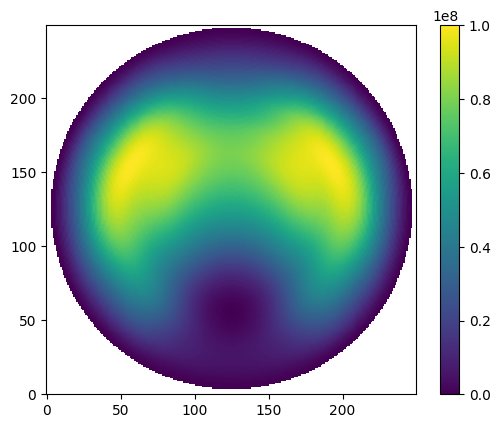

In [6]:
plot_beam(beam, B)

0.0 6.283185307179586 361


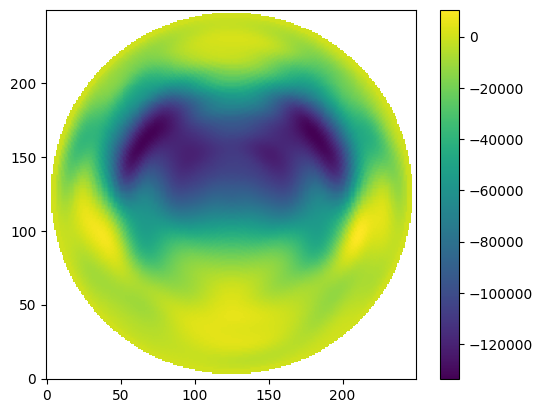

In [7]:
plot_beam(beamp-beam,B)

In [8]:
np.std((beamp-beam)/beam.mean())

0.0008428313723635026